In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_ts_r = pd.read_csv("./data/df_timeseries_en.tsv.gz", compression="infer", sep="\t")

In [3]:
print(len(df_ts_r))
df_ts_r.head()

18872499


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [4]:
missing_columns = df_ts_r.columns[df_ts_r.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_ts_r[df_ts_r.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')

Columns with missing values:  ['category']
20584 rows wih missing values


In [5]:
df_ts = df_ts_r.drop(index=missing_indices)
print('Length after dropping missing values:', len(df_ts_r))

Length after dropping missing values: 18872499


In [6]:
df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
df_ts['month'] = df_ts['datetime'].dt.month
df_ts['year'] = df_ts['datetime'].dt.year
df_ts['day'] = df_ts['datetime'].dt.day
df_ts.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,month,year,day
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3,7,2017,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1,7,2017,10
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1,7,2017,17
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0,7,2017,24
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0,7,2017,31


In [7]:
category = 'Education'
df_ed = df_ts[df_ts['category'] == category]

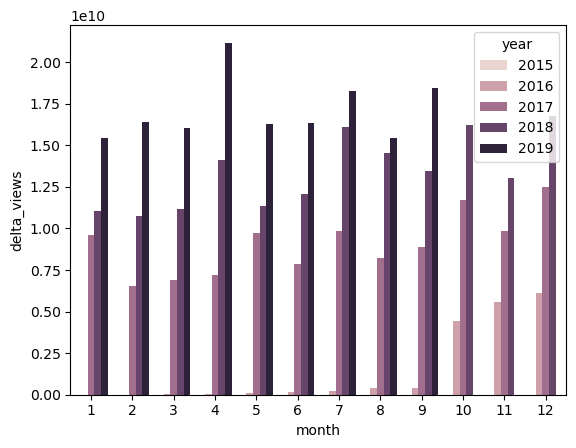

In [8]:
views_peak = df_ed.groupby(['month', 'year'])['delta_views'].sum().reset_index(name='delta_views')
barplot = sns.barplot(data=views_peak, x='month', y='delta_views', hue='year')

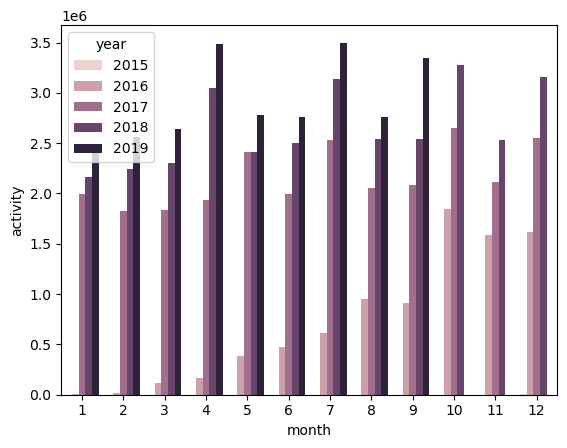

In [9]:
activity_peak = df_ts.groupby(['month', 'year'])['activity'].sum().reset_index(name='activity')
barplot = sns.barplot(data=activity_peak, x='month', y='activity', hue='year')

,datetime,activity_peak
0,2017-01-01 23:00:00,2.770107e+10
1,2017-01-02 00:00:00,5.714935e+08
2,2017-01-08 23:00:00,3.472725e+10
3,2017-01-09 00:00:00,6.909306e+08
4,2017-01-15 23:00:00,6.899954e+10
...,...,...
100,2017-12-17 23:00:00,3.830670e+10
101,2017-12-18 00:00:00,3.213794e+09
102,2017-12-24 23:00:00,3.960199e+10
103,2017-12-25 00:00:00,3.393706e+09


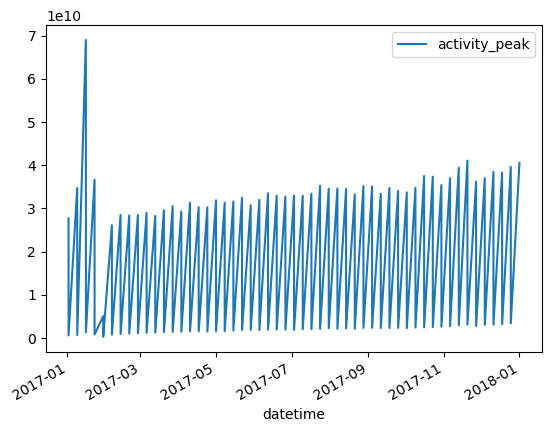

In [10]:
import matplotlib.pyplot as plt
activity_peak = df_ts[df_ts['year'] == 2017].groupby('datetime')['delta_views'].sum().reset_index(name='activity_peak')
activity_peak.plot(x='datetime', y='activity_peak', kind='line')
activity_peak

In [11]:
df_vd_f = pd.read_feather("./data/yt_metadata_helper.feather")
df_vd_f.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


In [12]:
missing_columns = df_vd_f.columns[df_vd_f.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_vd_f[df_vd_f.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')

Columns with missing values:  ['dislike_count', 'like_count', 'view_count']
1631458 rows wih missing values


In [13]:
df_vd = df_vd_f.copy()

In [14]:
df_vd = df_vd.drop(index=missing_indices)
print('Length after dropping missing values:', len(df_vd))

Length after dropping missing values: 71293336


In [15]:
df_vd_edu = df_vd[df_vd['categories'] == 'Education']
print(len(df_vd_edu))

3599719


In [16]:
df_vd_edu['year'] = df_vd_edu['upload_date'].dt.year
df_vd_edu['month'] = df_vd_edu['upload_date'].dt.month
df_vd_edu['day'] = df_vd_edu['upload_date'].dt.day
df_vd_edu.head()

C:\Users\fpili\AppData\Local\Temp\ipykernel_16004\2636699938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd_edu['year'] = df_vd_edu['upload_date'].dt.year
C:\Users\fpili\AppData\Local\Temp\ipykernel_16004\2636699938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd_edu['month'] = df_vd_edu['upload_date'].dt.month
C:\Users\fpili\AppData\Local\Temp\ipykernel_16004\2636699938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,year,month,day
185,Education,UCzWrhkg9eK5I8Bm3HfV-unA,3.0,jCaqrZ8gSkY,116,11.0,2016-05-03,2720.0,2016,5,3
275,Education,UCzWrhkg9eK5I8Bm3HfV-unA,1094.0,VZ6_wQxKVSI,940,2884.0,2015-06-30,4530589.0,2015,6,30
276,Education,UCzWrhkg9eK5I8Bm3HfV-unA,4.0,0CsvKzQNd7g,412,12.0,2015-06-20,18053.0,2015,6,20
1671,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2.0,WNR69JYddKA,156,68.0,2015-07-24,7758.0,2015,7,24
1672,Education,UCzWn_gTaXyH5Idyo8Raf7_A,8.0,0alQMm9IOaI,1109,124.0,2015-07-17,7499.0,2015,7,17


In [17]:
activity = df_vd_edu.groupby(['year', 'upload_date']).size().reset_index(name='activity')
activity

,year,upload_date,activity
0,2005,2005-11-02,3
1,2005,2005-11-16,3
2,2005,2005-11-21,1
3,2006,2006-01-12,3
4,2006,2006-02-17,1
...,...,...,...
4670,2019,2019-10-07,1
4671,2019,2019-10-13,1
4672,2019,2019-10-14,1
4673,2019,2019-10-18,1


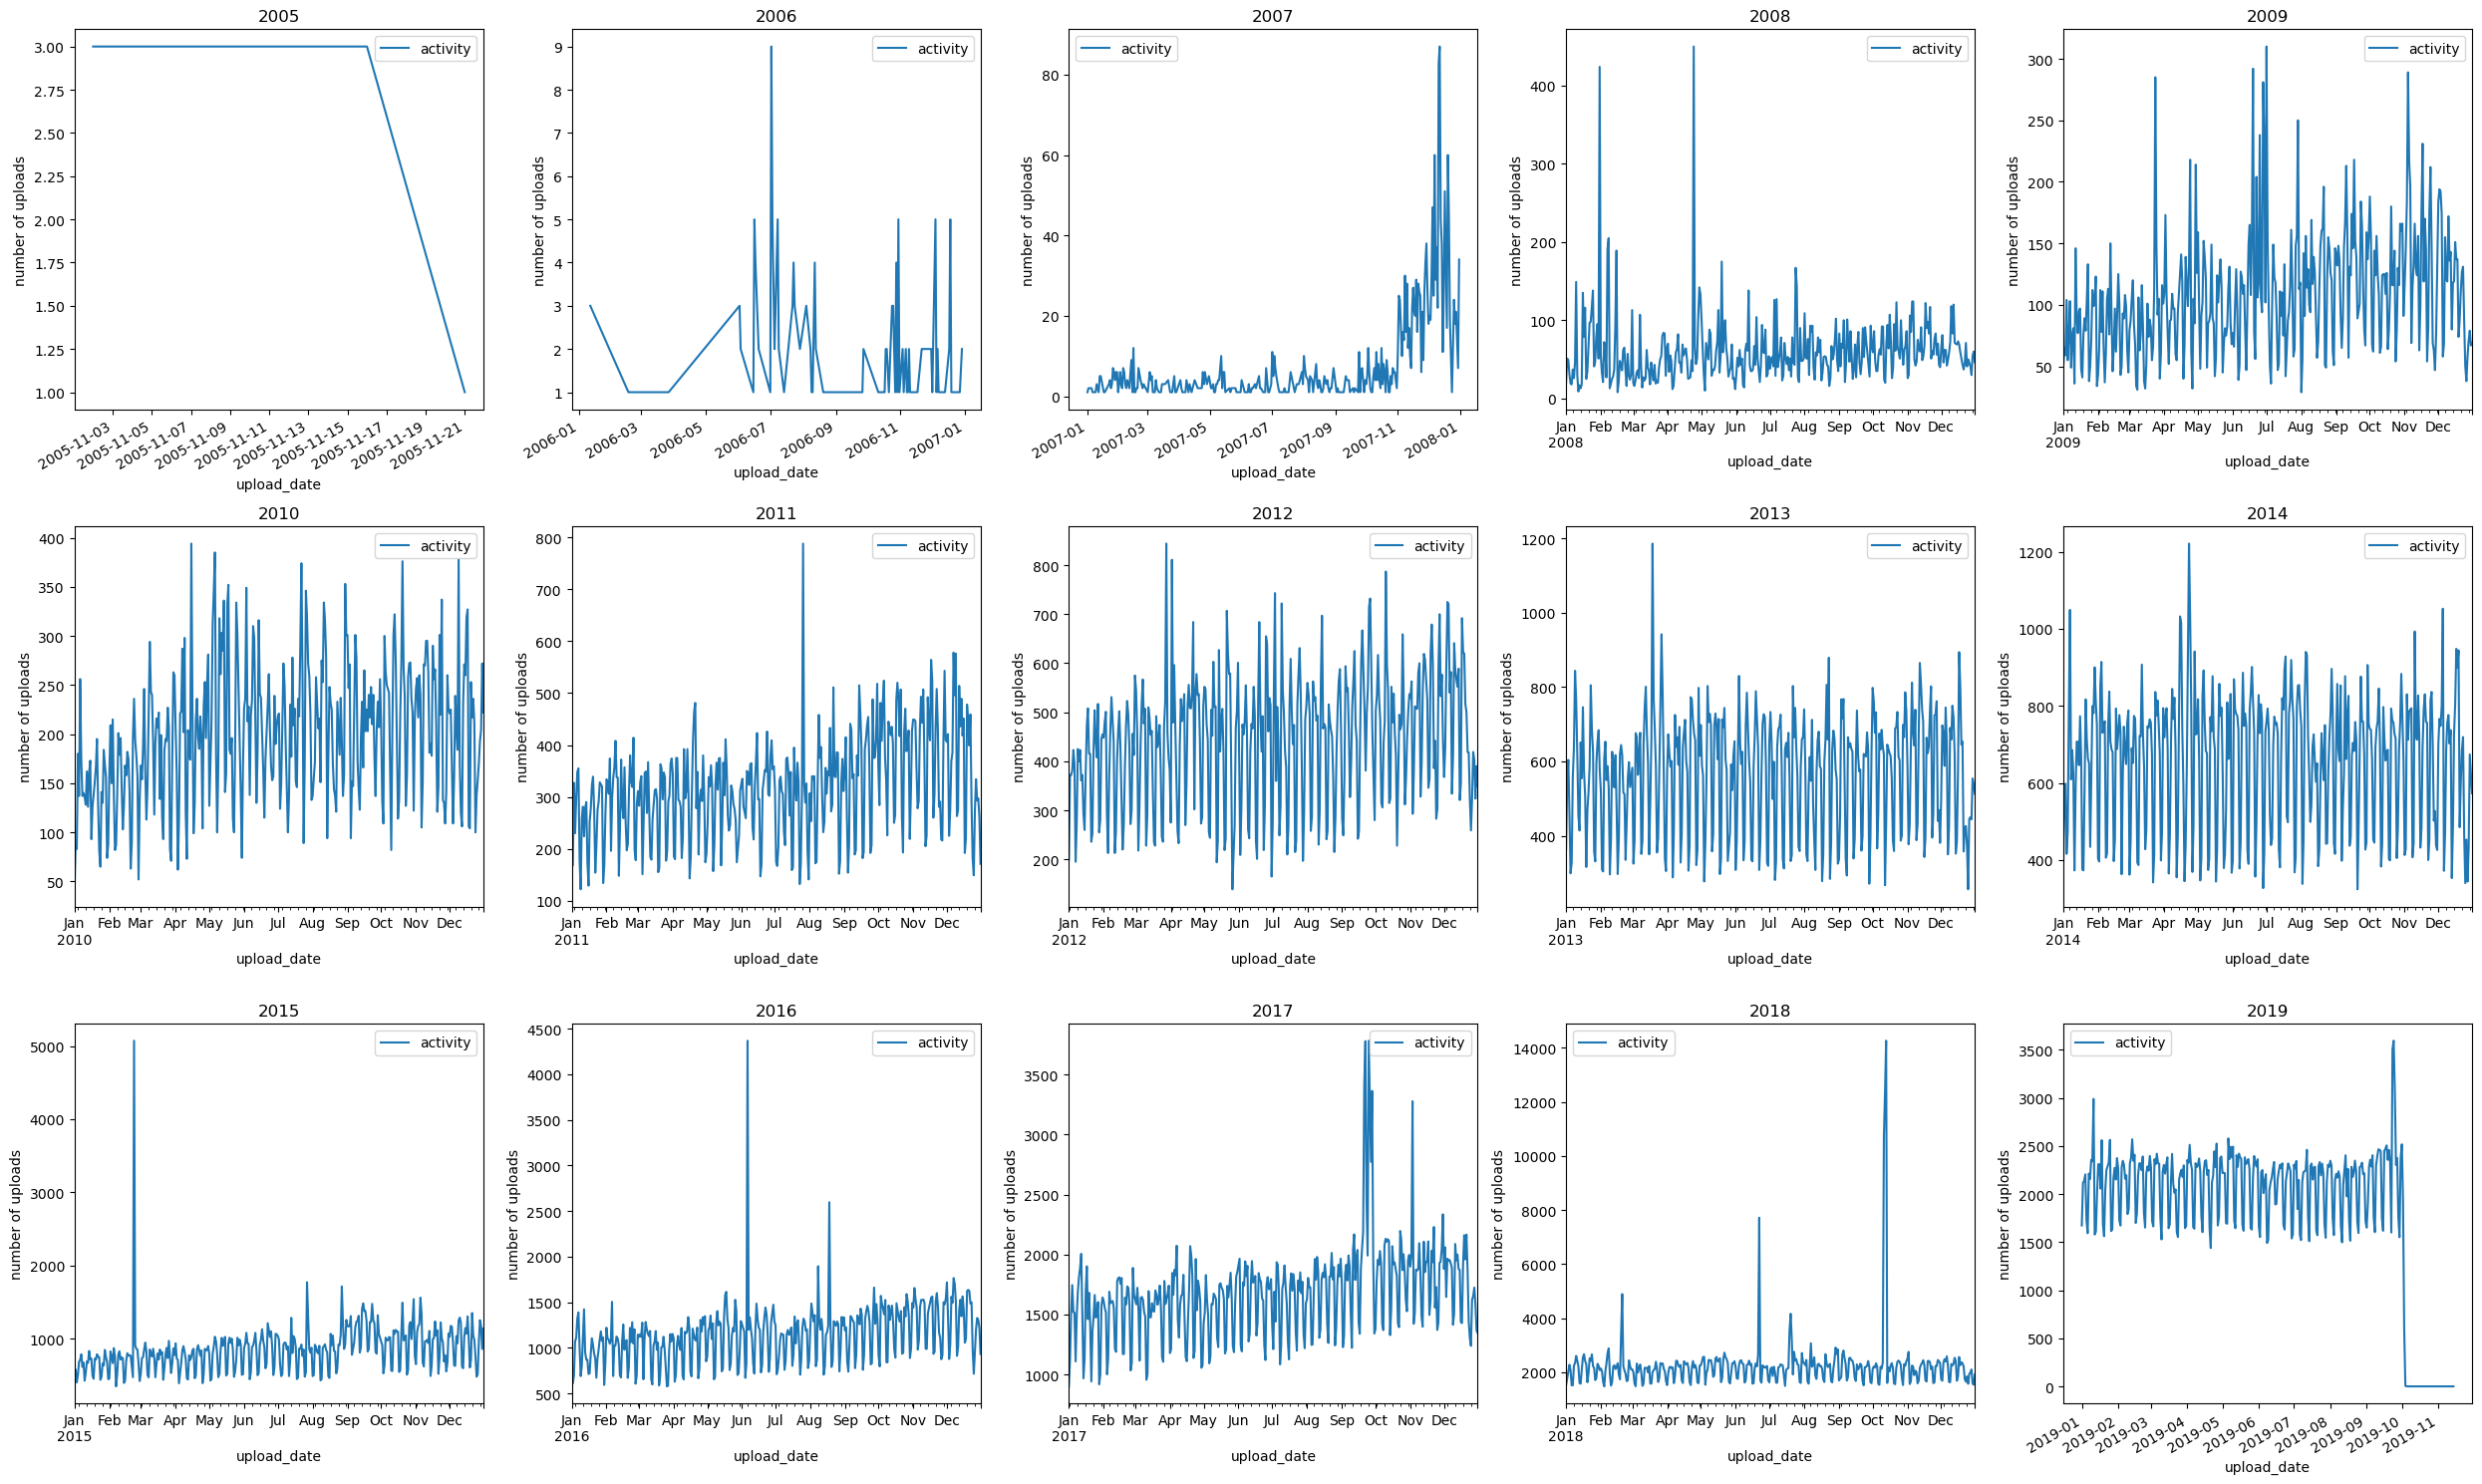

In [18]:
years = [2005 + i for i in range(15)]
nb_c = 5
nb_r = 3
fig, ax = plt.subplots(nb_r, nb_c, figsize=(nb_c*5, 15))
ax = ax.flatten()
for i, year in enumerate(years) :
    activity[activity['year'] == year].plot(x='upload_date', y='activity', ax=ax[i], kind='line')
    ax[i].set_ylabel('number of uploads')
    ax[i].set_title(str(year))
plt.tight_layout()

In [19]:
activity_per_month = df_vd_edu[df_vd_edu['duration'] > 2700].groupby(['year', 'month']).size().reset_index(name='activity')
activity_per_month

,year,month,activity
0,2006,2,1
1,2006,10,2
2,2006,11,2
3,2007,1,18
4,2007,2,10
...,...,...,...
145,2019,6,6912
146,2019,7,7509
147,2019,8,7144
148,2019,9,7633


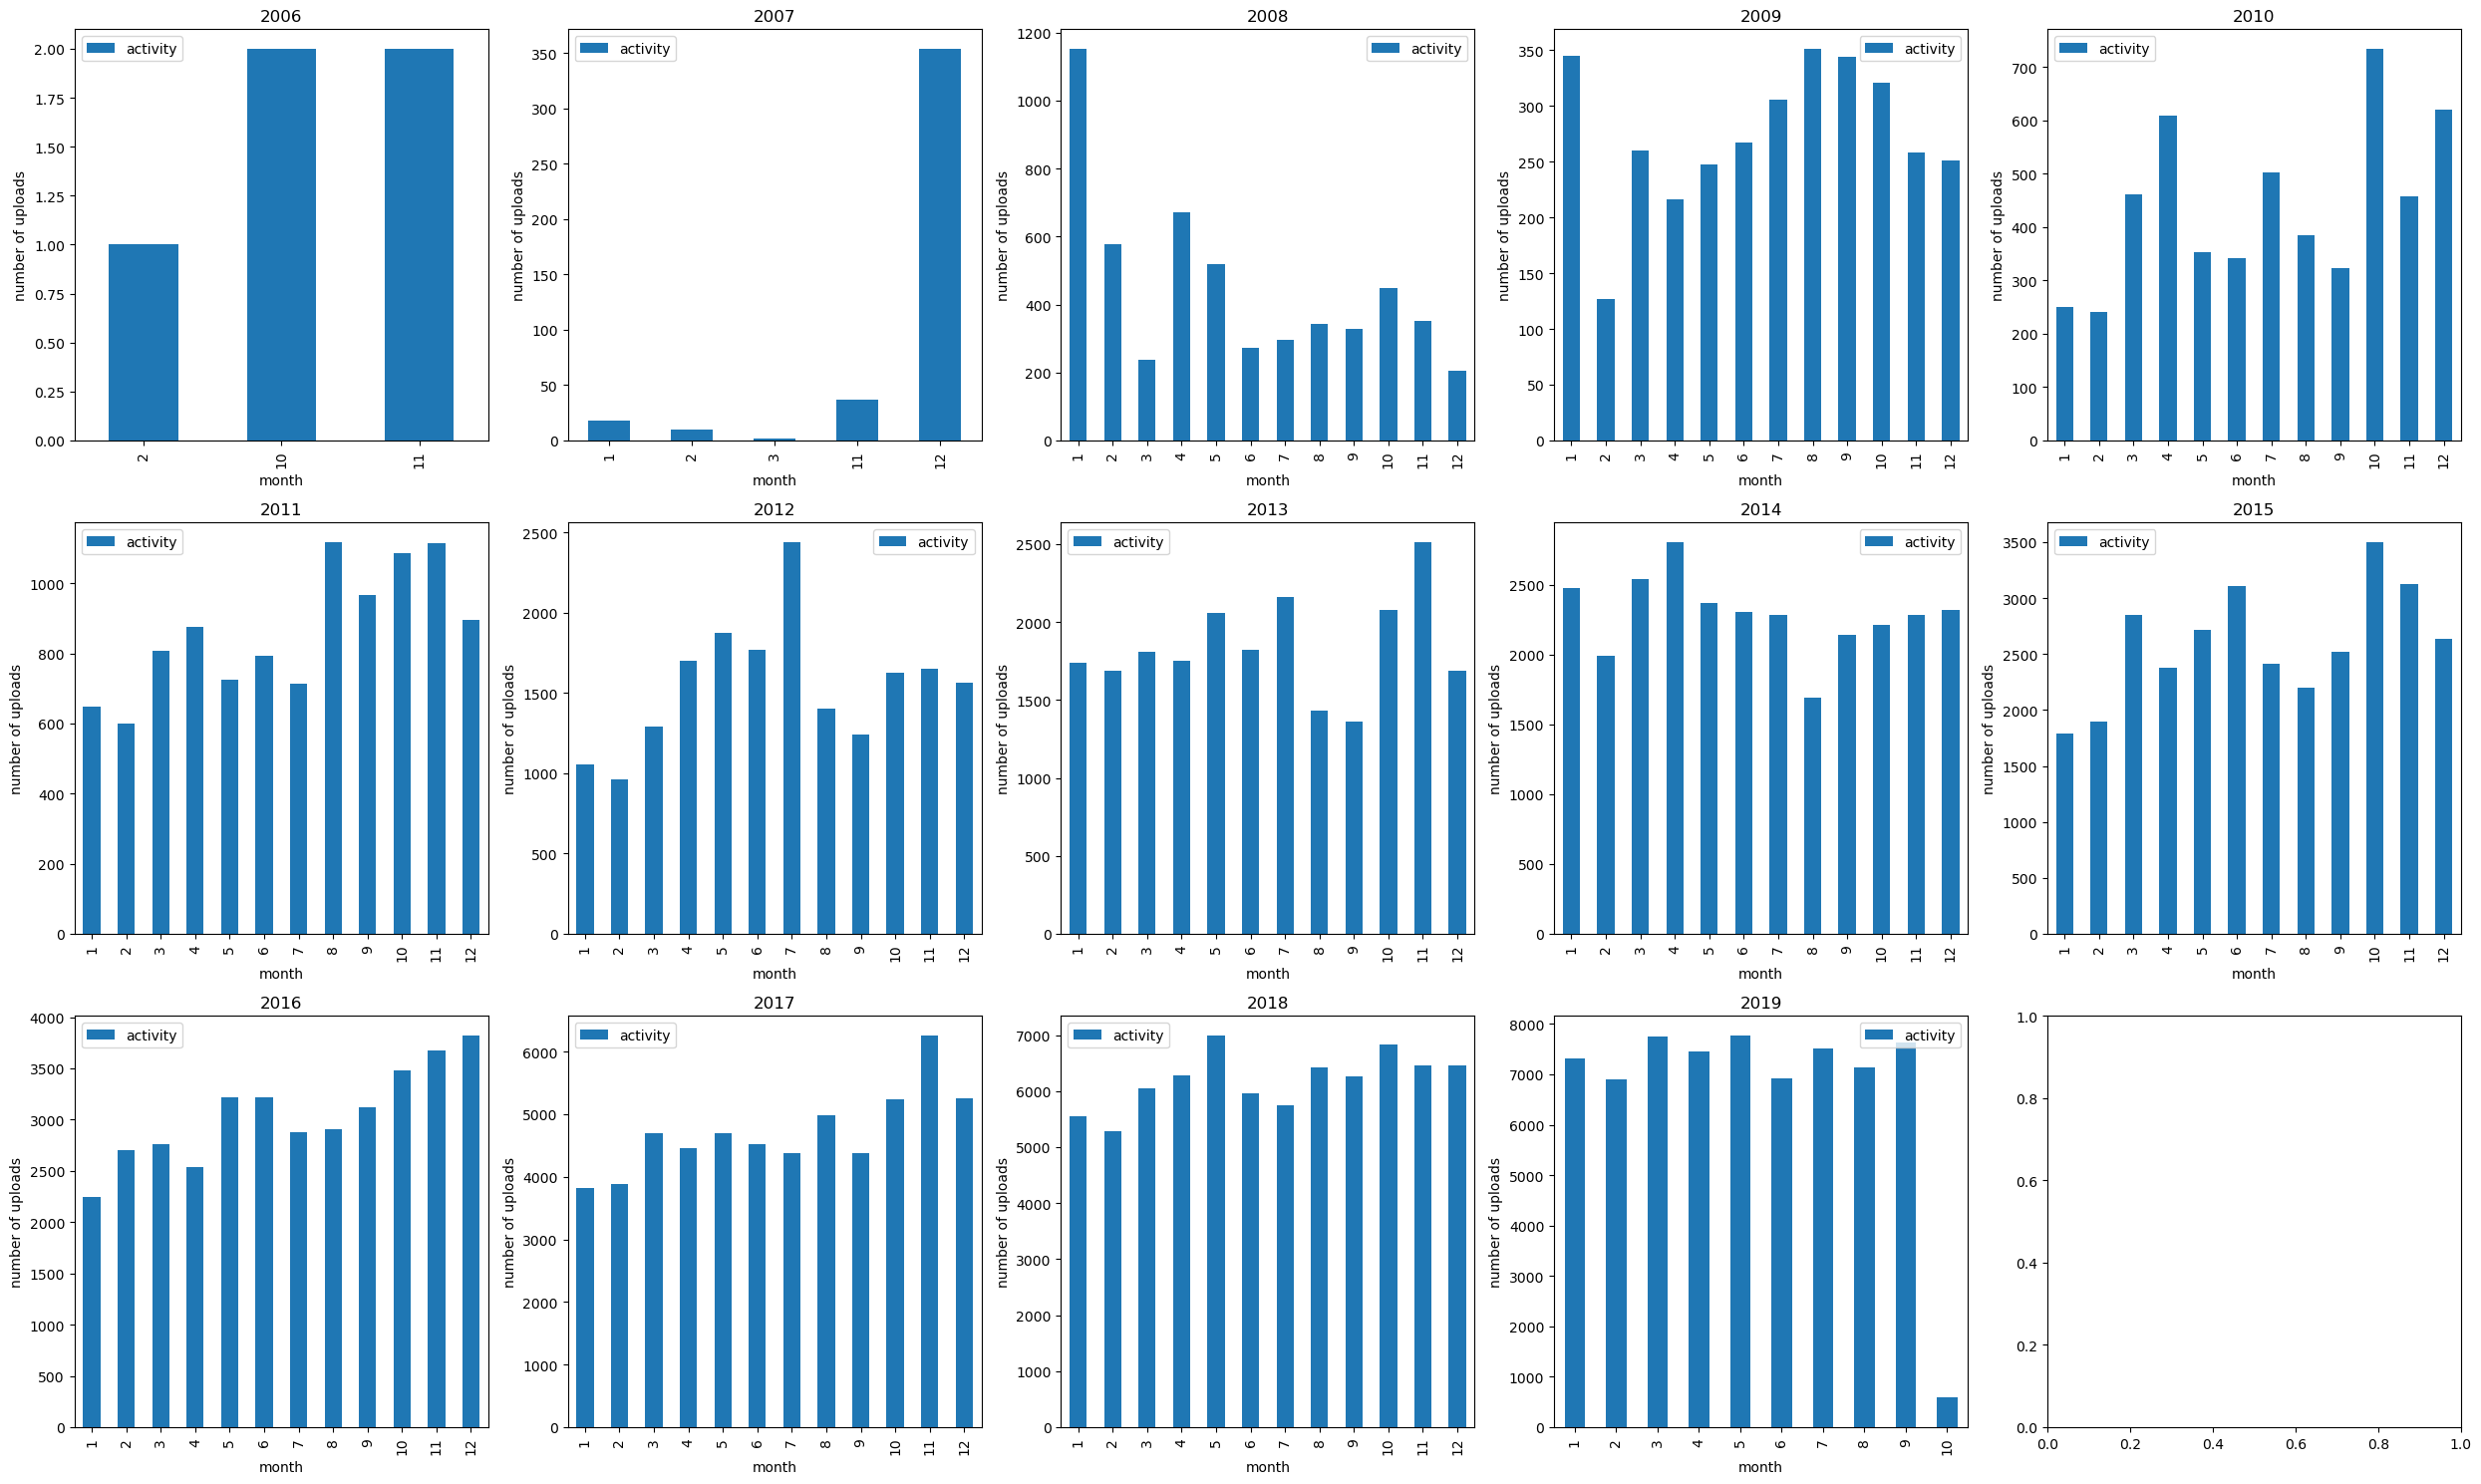

In [20]:
years = [2005 + i for i in range(15) if (len(activity_per_month[activity_per_month['year'] == 2005 + i]) != 0)]
nb_c = 5
nb_r = 3
fig, ax = plt.subplots(nb_r, nb_c, figsize=(nb_c*5, 15))
ax = ax.flatten()
for i, year in enumerate(years) :
    activity_per_month[activity_per_month['year'] == year].plot(x='month', y='activity', ax=ax[i], kind='bar')
    ax[i].set_ylabel('number of uploads')
    ax[i].set_title(str(year))
plt.tight_layout()